# 7. Регрессионный анализ

```
Ауд.: 345(330), 350(335), 405(383)
Д/З: 346(331), 351(336), 406(384)
```

## Линейная регрессия

$$ M[Y|x] = f(x) = \beta_{0} + \beta_{1} x $$

$$ Y = \beta_{0} + \beta_{1} x + \varepsilon, $$

$$ \varepsilon \sim N(0, \sigma^2 (неизв)) $$

МНК-оценки:

$$ \tilde{\beta_1} = \frac{Q_{xy}}{Q_{x}}, $$

$$ Q_{xy} = \sum (x_i - \overline{x})(y_i - \overline{y}), Q_{x} = \sum (x_i - \overline{x})^2 $$

$$ \tilde{\beta_0} = \overline{y} - \tilde{\beta_1} \overline{x} $$

$$ e_i = y_i - \tilde{y_i} $$

Остаточная сумма квадратов:

$$ Q_e = \sum e_i^2 = \sum (y_i - \tilde{y_i})^2 $$

$$ Q_y = Q_R + Q_e, Q_y = \sum y_i^2 - n \overline{y}^2, Q_R = \frac{Q^2_{xy}}{Q_x} $$

$Q_R$ &mdash; сумма квадратов, обусловленная регрессией; $Q_e$ &mdash; остаточная сумма квадратов

$$ s^2 = \frac{Q_e}{n-2} $$

### Значимость линейной регрессии

Доверительный интервал для $\beta_1$:

$$ \tilde{\beta_1} \pm t_{1 - \alpha/2}(n - 2) s \sqrt{\frac{1}{Q_x}} $$

Доверительный интервал для $\beta_0$:

$$ \tilde{\beta_0} \pm t_{1 - \alpha/2}(n - 2) s \sqrt{\frac{ \sum x_i^2 }{ n Q_x }} $$

Регрессия значима, если доверительный интервал для $\beta_1$ не накрывает 0.

Доверительный интервал для $\overline{Y_0}(x = x_0)$:

$$ \tilde{y_0} \pm t_{1 - \alpha/2}(n - 2) s \sqrt{\frac{1}{n} + \frac{ (x_0 - \overline{x})^2 }{ Q_x }} $$

In [3]:
from scipy import stats
import numpy as np

alpha = 0.1

Qe = 6.199
Qx = 131.22
n = 9
beta1 = -1.057
beta0 = 20.34

q = stats.t(n-2).ppf(1 - alpha/2)

print(q)

s = np.sqrt(Qe / (n - 2))

delta_beta1 = q*s*np.sqrt(1 / Qx)

delta_beta0 = q*s*np.sqrt(865.63/n/Qx)

print('b1 +- {}'.format(delta_beta1))
print('b0 +- {}'.format(delta_beta0))

1.89457860506
b1 +- 0.15564114248683683
b0 +- 1.526403330710377


## Криволинейная регрессия

$$ M[Y|x] = \beta_0 + \beta_1 a_1(x) + ... + \beta_{k-1} a_{k-1}(x), $$

где $a_i$ - известные функции.

МНК-оценки параметров регрессии:

$$
Y = \begin{pmatrix}
y_1 \\
y_2 \\
\dots \\
y_n
\end{pmatrix}
$$

$$
A = \begin{pmatrix}
1     & a_1(x_1) & \dots & a_{k-1}(x_1) \\
1     & a_1(x_2) & \dots & a_{k-1}(x_2) \\
\dots & \dots    & \dots & \dots \\
1     & a_1(x_n) & \dots & a_{k-1}(x_n)
\end{pmatrix}
$$

$$
\beta = \begin{pmatrix}
\beta_0 \\ \beta_1 \\ \dots \\ \beta_{k-1}
\end{pmatrix}
$$

Тогда $ \tilde{\beta} = (A^T A)^{-1} A^T Y $

[[ 0.821  0.321  0.    -0.143 -0.107  0.107]
 [-0.295  0.002  0.164  0.193  0.087 -0.152]
 [ 0.022 -0.004 -0.018 -0.018 -0.004  0.022]]
[ 4.         -2.16428571  0.26785714]


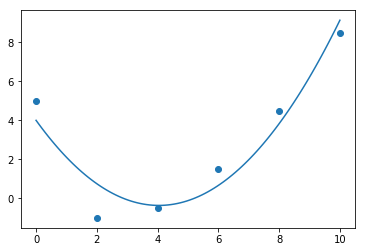

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 2, 4, 6, 8, 10])
y = np.array([5, -1, -0.5, 1.5, 4.5, 8.5])

plt.scatter(x, y)

A = np.array([
    [1, x_i, x_i ** 2] for x_i in x
])

beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

print(
    np.around(
        np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
    , 3)
)
print(beta)

domain = np.linspace(min(x), max(x), 100)
values = beta[0] + beta[1] * domain + beta[2] * domain ** 2

plt.plot(domain, values);

## Множественная линейная регрессия

$$ y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \varepsilon_i $$

$Q_y = \sum y_i^2 - \frac{\left( \sum y_i \right)^2}{n} $

$Q_{x_j} = \sum_i x_{ji}^2 - \frac{\left( \sum x_{ji}^2 \right)^2}{n} $

$Q_{x_jy} = \sum_i x_{ji} y_i - \frac{\left( \sum_i x_{ji} \right) \left( \sum y_{i} \right)}{n} $

$Q_{x_1 x_2} = \sum_i x_{1i} x_{2i} - \frac{\left( \sum_i x_{1i} \right) \left( \sum x_{2i} \right)}{n} $

$$
A^T A = \begin{pmatrix}
Q_{x_1} & Q_{x_1 x_2} \\
Q_{x_1 x_2} & Q_{x_2}
\end{pmatrix}
$$

$$
\tilde{\beta} = \begin{pmatrix}
Q_{x_2} & -Q_{x_1 x_2} \\
-Q_{x_1 x_2} & Q_{x_1}
\end{pmatrix}
\begin{pmatrix}
Q_{x_1 y} \\
Q_{x_2 y}
\end{pmatrix}
\frac{1}{|A^T A|}
$$

$$ \tilde{\beta}_0 = \overline{y} - \tilde{\beta}_1 \overline{x_1} - \tilde{\beta}_2 \overline{x_2}  $$


### Значимость множественной регрессии

$H0: \beta_1 = \beta_2 = 0$,

$$ F = \frac{\tilde{\beta}^T A^T Y/2}{Q_e / (n - 3)} < F_{1-\alpha}(2, n-3) $$

$H0: \beta_j = 0$,

$$ \tilde{\beta_j} \pm t_{1 - \alpha/2}(n - 3) s \sqrt{a_{jj}}, $$

где $a_{jj} = (A^T A)[j, j]$, $s = \sqrt{\frac{Q_e}{n - 3}}$


Кф множественной корреляции $R = \sqrt{\frac{ \tilde{\beta}^T A^T Y }{ Q_y }}$, где

$$
A^T Y = \begin{pmatrix}
Q_{x_1 y} \\
Q_{x_2 y} \\
\end{pmatrix}
$$

In [ ]:
import numpy as np

x1 = np.array([1, 4, 0, 5, -3, 3, -5, -1, 2, -2])
x2 = np.array([4, -6, 2, -4, 12, -2, 14, 6, 0, 8])
y = np.array([-4, -5, 4, -1, 4, 0, 5, 1, 2, 7])

n = len(y)

Qy = np.sum(y ** 2) - np.sum(y) ** 2 / n
Qx1 = np.sum(x1 ** 2) - np.sum(x1 ** 2) ** 2 / n
Qx2 = np.sum(x2 ** 2) - np.sum(x2 ** 2) ** 2 / n
Qx1y = np.sum(x1 * y) - np.sum(x1) * np.sum(y) / n